In [1]:
%pylab inline
import os.path as op
import sys
import os

import json
import sys
sys.path.insert(0, "..")

Populating the interactive namespace from numpy and matplotlib


In [34]:
save_figures = False
save_figures = True

## Import openslide

In [2]:
pth = op.expanduser(r"~\Downloads\openslide-win64-20171122\bin")
print(op.exists(pth))
# pth = op.expanduser(r"~\projects\scaffan\devel\knihovny")
# pth = op.expanduser(r"~\Miniconda3\envs\lisa36\Library\bin")
sys.path.insert(0, pth)
orig_PATH = os.environ["PATH"]
os.environ["PATH"] = pth + ";" + os.environ["PATH"]

True


In [3]:
# import numpy as np
import openslide as opsl
import scaffan

## Import lxml 

Doesnt work :-( #TODO

In [4]:

# os.environ["PATH"] = orig_PATH

In [5]:
#import lxml
#from lxml import etree


In [6]:
# dir(lxml)
# from lxml import etree 

# annotation_file = "e:data/scaffold/Hamamatsu/PIG-003_J-18-0165_HE.ndpi.ndpa"
# etree.parse(annotation_file)

In [7]:
# import lxml.etree

# Work with image data

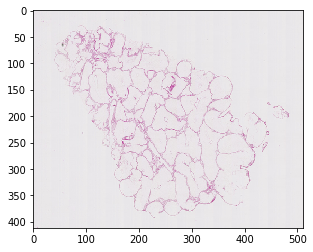

In [8]:
pth = op.expanduser(r"~\data\medical\orig\Scaffan-analysis\PIG-003_J-18-0165_HE.ndpi")
pth = op.expanduser(r"~\data\medical\orig\Scaffan-analysis\PIG-005_J-18-0633_HE_PRML per decell.ndpi")
imsl = opsl.OpenSlide(pth)
imthumb = imsl.get_thumbnail((512, 512))
img = np.array(imthumb)
plt.imshow(imthumb)

## Histogram normalization

$$
y_0=kx_0 + q\\
y_1=kx_1 + q\\
$$
$$
y_0 - y1 = k (x_0 - x_1)\\
k = \frac{y_0 - y_1}{x_0 - x_1}\\
q = y_0 - kx_1
$$



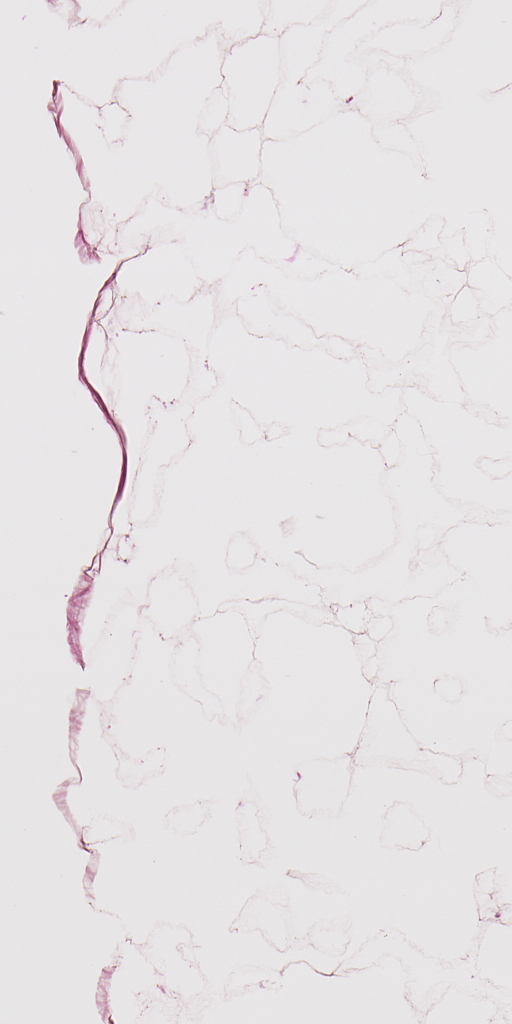

In [31]:
# one lobulus
kwargs_sample1 = dict(
    location = (13910, 15000),
    level = 1,
#     size = (512, 512),
#     size = (1024, 1024),
    size = (512, 1024),
)
img0 = imsl.read_region(**kwargs_sample1)
img0

In [10]:
img.dtype == np.uint8

True

## Setup rescaler

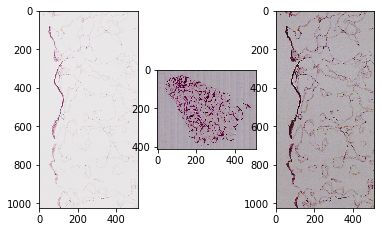

In [32]:
from scaffan.image_intensity_rescale import RescaleIntensityPercentile
rescaler = RescaleIntensityPercentile()
rescaler.set_parameters(sig_slope=1)
rescaler.calculate_intensity_dependent_parameters(np.array(img))
img_rescaled = rescaler.rescale_intensity(np.array(img))

img_rescaled0 = rescaler.rescale_intensity(np.array(img0))
plt.subplot(131)
plt.imshow(img0)
plt.subplot(132)
plt.imshow(img_rescaled)
plt.subplot(133)
plt.imshow(img_rescaled0)

In [35]:
if save_figures:
    plt.imsave("../graphics/intensity_normalization_small_input.png", np.array(img0))
    plt.imsave("../graphics/intensity_normalization_small_input.eps", np.array(img0))
    plt.imsave("../graphics/intensity_normalization_small_output.png", np.array(img_rescaled0))
    plt.imsave("../graphics/intensity_normalization_small_output.eps", np.array(img_rescaled0))


In [ ]:
import seaborn as sns
x = np.linspace(0, 255, 255) 
current_palette = sns.color_palette()

y = rescaler.rescale_intensity(x)
fig, ax = plt.subplots()
# ax = plt.figure()
# ax.axis('equal')

cmap = plt.get_cmap()

ax0 = ax.twinx()
ax0.set_ylabel("Relative Input Intensity Distribution")
# plt.hist(img.ravel(), normed=True, cumulative=False, bins=20,)
sns.distplot(img.ravel(), bins=64, kde=False, norm_hist=True, axlabel="Distribution", label="Dist", color=current_palette[2])
lm = ax0.get_ylim()
ax0.set_ylim([lm[0], lm[1] * 2])

ax1 = ax.twiny()
ax1.set_xlabel("Relative Output Intensity Distribution")
sns.distplot(img_rescaled.ravel(), bins=64, kde=False, norm_hist=True, axlabel="Distribution", 
             label="Dist", vertical=True, ax=ax1, color=current_palette[3])
lm = ax1.get_xlim()
ax1.set_xlim([lm[0], lm[1] * 2])

ax.plot()
ax.plot(x, y, color=current_palette[0])
ax.set_xlabel("Input Intensity")
ax.set_ylabel("Output Intensity")
ax.set_ylim([ax.get_ylim()[0], 260])

y_prv = rescaler.rescale_intensity(rescaler.percentile_range_values)
y_prv
ax.plot(rescaler.percentile_range_values, y_prv, "o", color=current_palette[1])
# ax.
rescaler.input_dtype

ax.axvline(rescaler.percentile_range_values[0], linestyle="--", ymax=0.5, color=current_palette[1])
ax.axvline(rescaler.percentile_range_values[1], linestyle="--", ymax=0.9, color=current_palette[1])
if save_figures:
    plt.savefig("../graphics/intensity_normalization_5p.png", dpi=400, bbox_inches='tight')
    plt.savefig("../graphics/intensity_normalization_5p.pdf", dpi=400, bbox_inches='tight')
    plt.savefig("../graphics/intensity_normalization_5p.eps", dpi=400, bbox_inches='tight')

In [ ]:
if save_figures:
    plt.imsave("../graphics/intensity_normalization_input.png", img)
    plt.imsave("../graphics/intensity_normalization_output.png", img_rescaled)
